In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv("../input/train_1.csv",index_col=0)
data_cols=[u for u in train.columns if u.startswith('201')]
train=train[data_cols[:]]

In [3]:
weekends=(pd.Series(data_cols).astype('datetime64[ns]').dt.dayofweek // 5 == 1).values

In [4]:
val=train.values

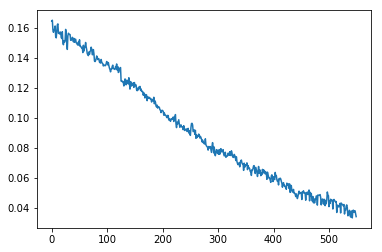

In [10]:
plt.plot((train.fillna(0)==0).values.mean(0))

In [13]:
def naorzero(X):
    return ((X==0)+np.isnan(X))>0

# weekend

In [16]:
N=49
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa=weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb=weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [18]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [19]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
436  436        0.767992       0.009941        0.190495     0.040076
437  437        0.767992       0.009941        0.190495     0.040076
438  438        0.769805       0.009941        0.191502     0.039959
439  439        0.763555       0.010044        0.193560     0.039621
440  440        0.763555       0.010044        0.193560     0.039621

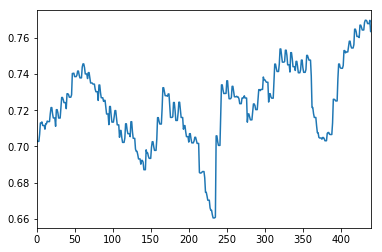

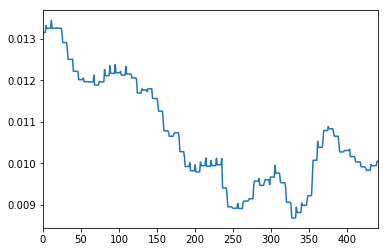

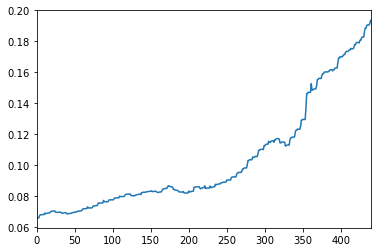

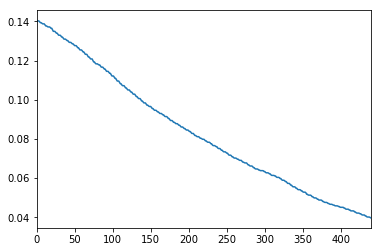

In [21]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [22]:
N=14
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa=weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb=weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [26]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [27]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
471  471        0.722130       0.008341        0.150302     0.040076
472  472        0.722130       0.008341        0.150302     0.040076
473  473        0.712733       0.008879        0.158369     0.039959
474  474        0.711771       0.008982        0.161362     0.039621
475  475        0.711771       0.008982        0.161362     0.039621

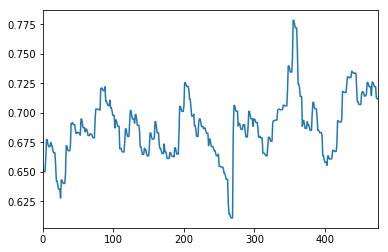

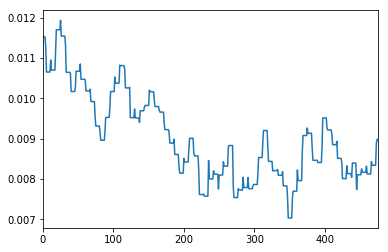

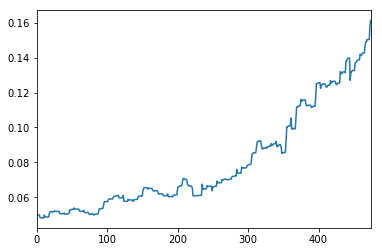

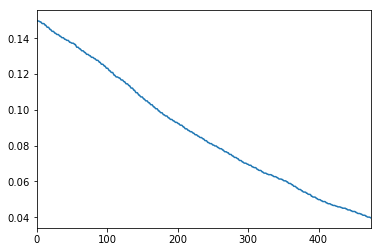

In [28]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# non-weekend

In [33]:
N=49
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa= ~weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb= ~weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [34]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [35]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
436  436        0.772519       0.010747        0.194561     0.042672
437  437        0.770127       0.010740        0.194895     0.042440
438  438        0.769845       0.010740        0.195291     0.042338
439  439        0.768978       0.010740        0.195514     0.042242
440  440        0.764199       0.010857        0.197437     0.042024

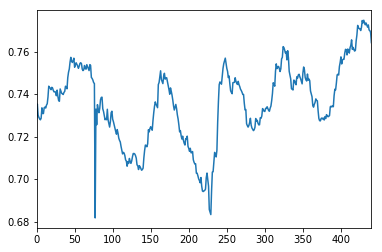

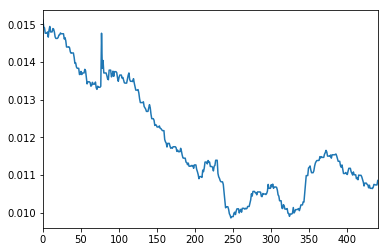

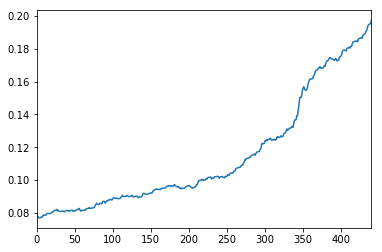

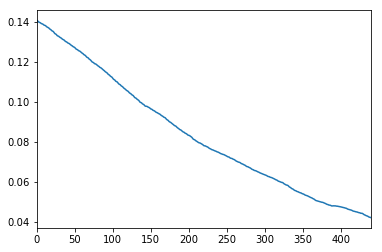

In [36]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [37]:
N=14
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa= ~weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb= ~weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [38]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [39]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
471  471        0.743203       0.010347        0.180214     0.042672
472  472        0.738831       0.010478        0.182415     0.042440
473  473        0.738494       0.010478        0.182769     0.042338
474  474        0.737949       0.010478        0.183048     0.042242
475  475        0.733122       0.010740        0.187364     0.042024

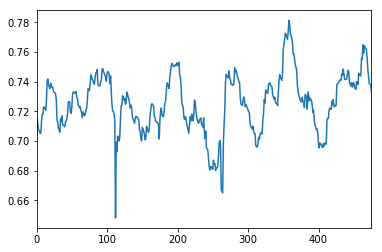

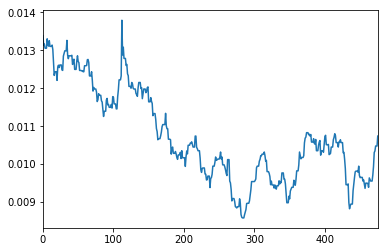

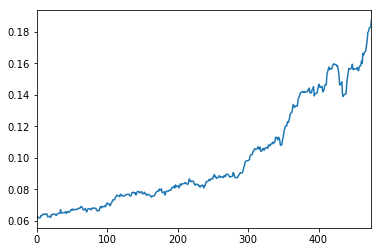

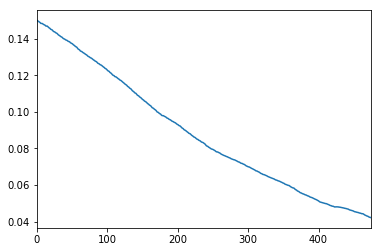

In [40]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# median

In [57]:
N=63
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [58]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [59]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
422  422        0.777527       0.010864        0.201638     0.041893
423  423        0.775616       0.010823        0.201157     0.041730
424  424        0.777746       0.010775        0.201131     0.041664
425  425        0.776291       0.010816        0.202111     0.041543
426  426        0.774851       0.010823        0.202644     0.041384

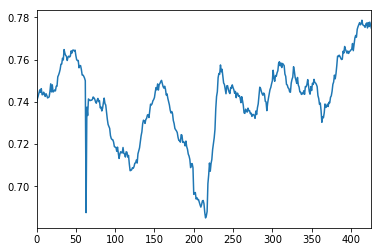

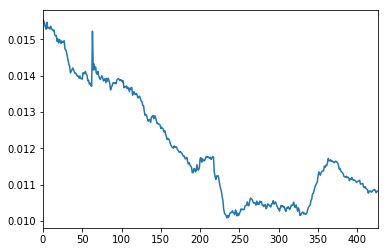

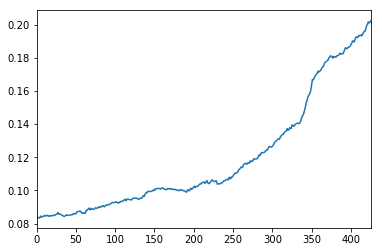

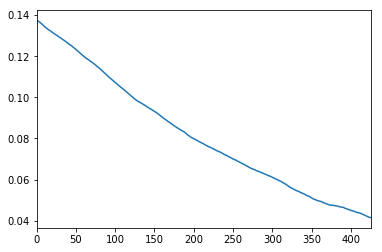

In [60]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [42]:
N=49
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [43]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [44]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
436  436        0.777207       0.010878        0.201811     0.041893
437  437        0.774656       0.010857        0.201548     0.041730
438  438        0.775350       0.010837        0.201666     0.041664
439  439        0.771597       0.010906        0.202553     0.041543
440  440        0.768599       0.011002        0.204338     0.041384

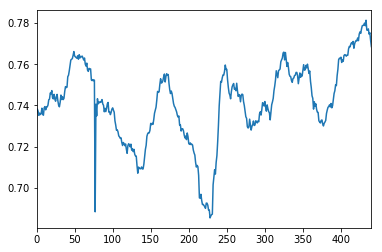

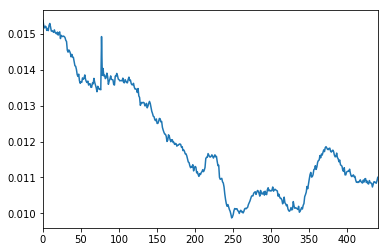

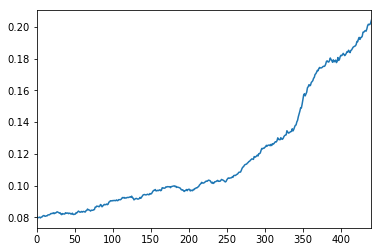

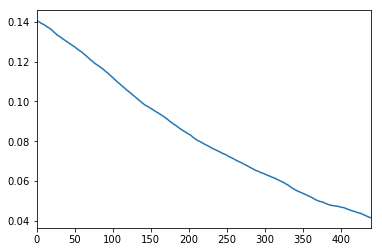

In [45]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [53]:
N=28
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [54]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [55]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
457  457        0.769257       0.010733        0.197089     0.041893
458  458        0.767559       0.010816        0.198941     0.041730
459  459        0.768526       0.010816        0.199509     0.041664
460  460        0.768613       0.010802        0.199857     0.041543
461  461        0.763381       0.011016        0.203205     0.041384

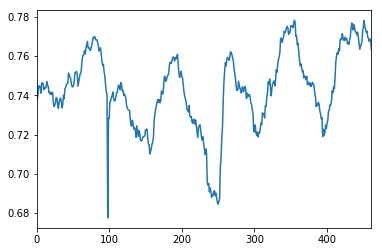

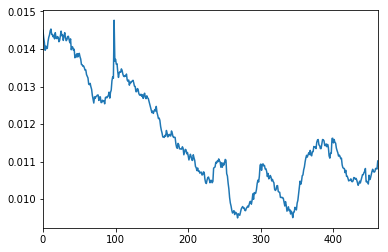

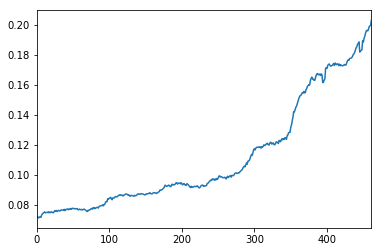

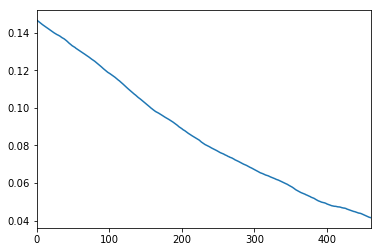

In [56]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [46]:
N=14
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [47]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [48]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
471  471        0.756176       0.010492        0.189382     0.041893
472  472        0.754818       0.010492        0.189778     0.041730
473  473        0.757874       0.010506        0.191101     0.041664
474  474        0.754759       0.010719        0.194751     0.041543
475  475        0.747919       0.010933        0.197594     0.041384

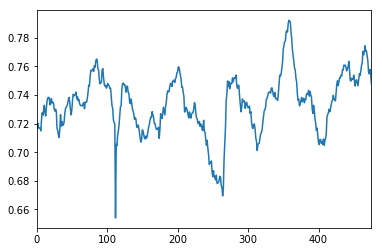

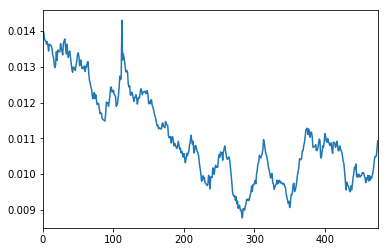

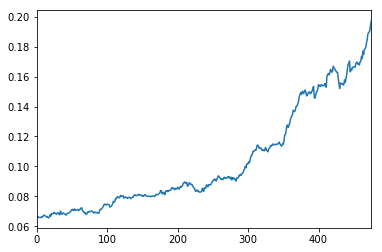

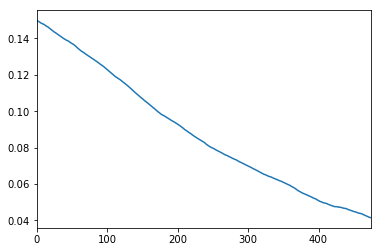

In [49]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# mean

In [50]:
N=14
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmean(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [51]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
471  471        0.813379       0.007480        0.145219     0.041893
472  472        0.810494       0.007576        0.147142     0.041730
473  473        0.810276       0.007659        0.148946     0.041664
474  474        0.807445       0.007824        0.152073     0.041543
475  475        0.802746       0.007948        0.154178     0.041384

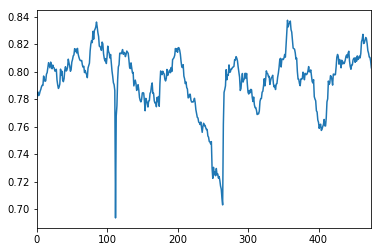

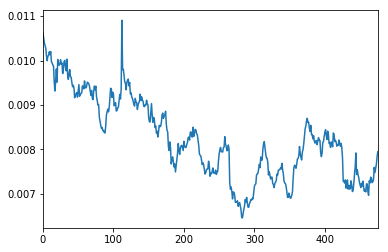

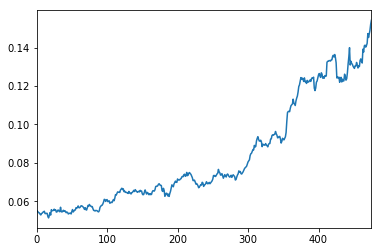

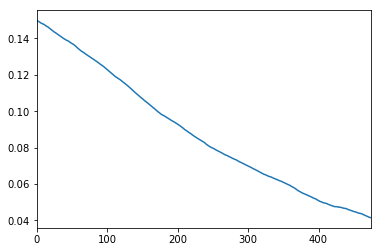

In [52]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()